In [1]:
from plato.environment import Environment

In [2]:
config = {
  "whites":{
    "params":{
    "n_white_infantry":10,
    "n_white_vehicle":4,
    "n_white_drone":2},
    "init":"NW"
  },

  "blacks":{
    "params":{
    "n_black_infantry":5,
    "n_black_vehicle":3,
    "n_black_drone":1},
    "init":"SE"
  }
}

In [3]:
sim = Environment(config, shape=(64,64))

In [4]:
obs = sim.reset()

In [5]:
for id_,w in sim.whites.items(): print('{:13}'.format(id_), w)

ATLANTA       <plato.entity.infantry.Infantry object at 0x118aa57d0>
SPALDING      <plato.entity.infantry.Infantry object at 0x117ff4b90>
WHISKEY       <plato.entity.infantry.Infantry object at 0x118ab24d0>
FOXTROT       <plato.entity.infantry.Infantry object at 0x118ab2f90>
PHOENIX       <plato.entity.infantry.Infantry object at 0x118ab5a90>
STILLWATER    <plato.entity.infantry.Infantry object at 0x118ab7590>
ECHO          <plato.entity.infantry.Infantry object at 0x118ab9090>
LAGUNA        <plato.entity.infantry.Infantry object at 0x118ab9b50>
TOMBSTONE     <plato.entity.infantry.Infantry object at 0x118abb650>
HIGGINS       <plato.entity.infantry.Infantry object at 0x118abd150>
TOKYO         <plato.entity.vehicle.Vehicle object at 0x118abf710>
WATERLOO      <plato.entity.vehicle.Vehicle object at 0x118ac2450>
MILWAUKEE     <plato.entity.vehicle.Vehicle object at 0x118abdc10>
CHICKASAW     <plato.entity.vehicle.Vehicle object at 0x10b8a8e90>
WINSLOW       <plato.entity.drone.Drone ob

In [6]:
for id_,w in sim.blacks.items(): print('{:13}'.format(id_), w)

unknown_0     <plato.entity.infantry.Infantry object at 0x118ac9290>
unknown_1     <plato.entity.infantry.Infantry object at 0x118abf790>
unknown_2     <plato.entity.infantry.Infantry object at 0x118ac9e50>
unknown_3     <plato.entity.infantry.Infantry object at 0x118acb450>
unknown_4     <plato.entity.infantry.Infantry object at 0x118acbf50>
unknown_5     <plato.entity.vehicle.Vehicle object at 0x118aca950>
unknown_6     <plato.entity.vehicle.Vehicle object at 0x118acb490>
unknown_7     <plato.entity.vehicle.Vehicle object at 0x118ad1dd0>
unknown_8     <plato.entity.drone.Drone object at 0x118ad42d0>


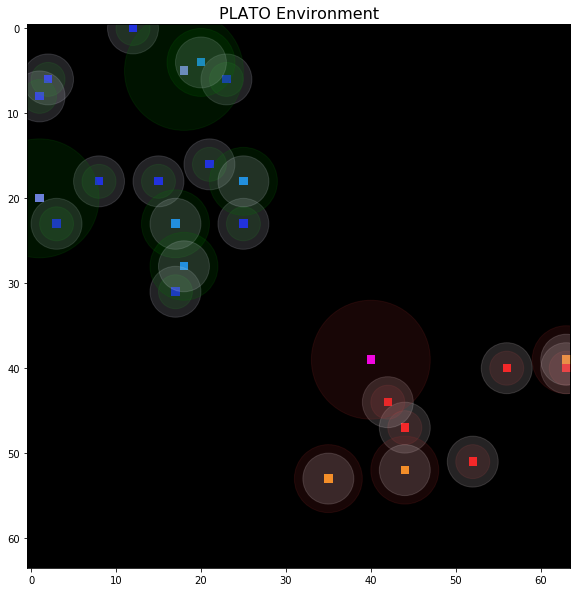

In [7]:
canvas = sim.render()

In [8]:
minimap = sim.observation(sim.whites, negative=None)
minimap.shape

(25, 64, 64)

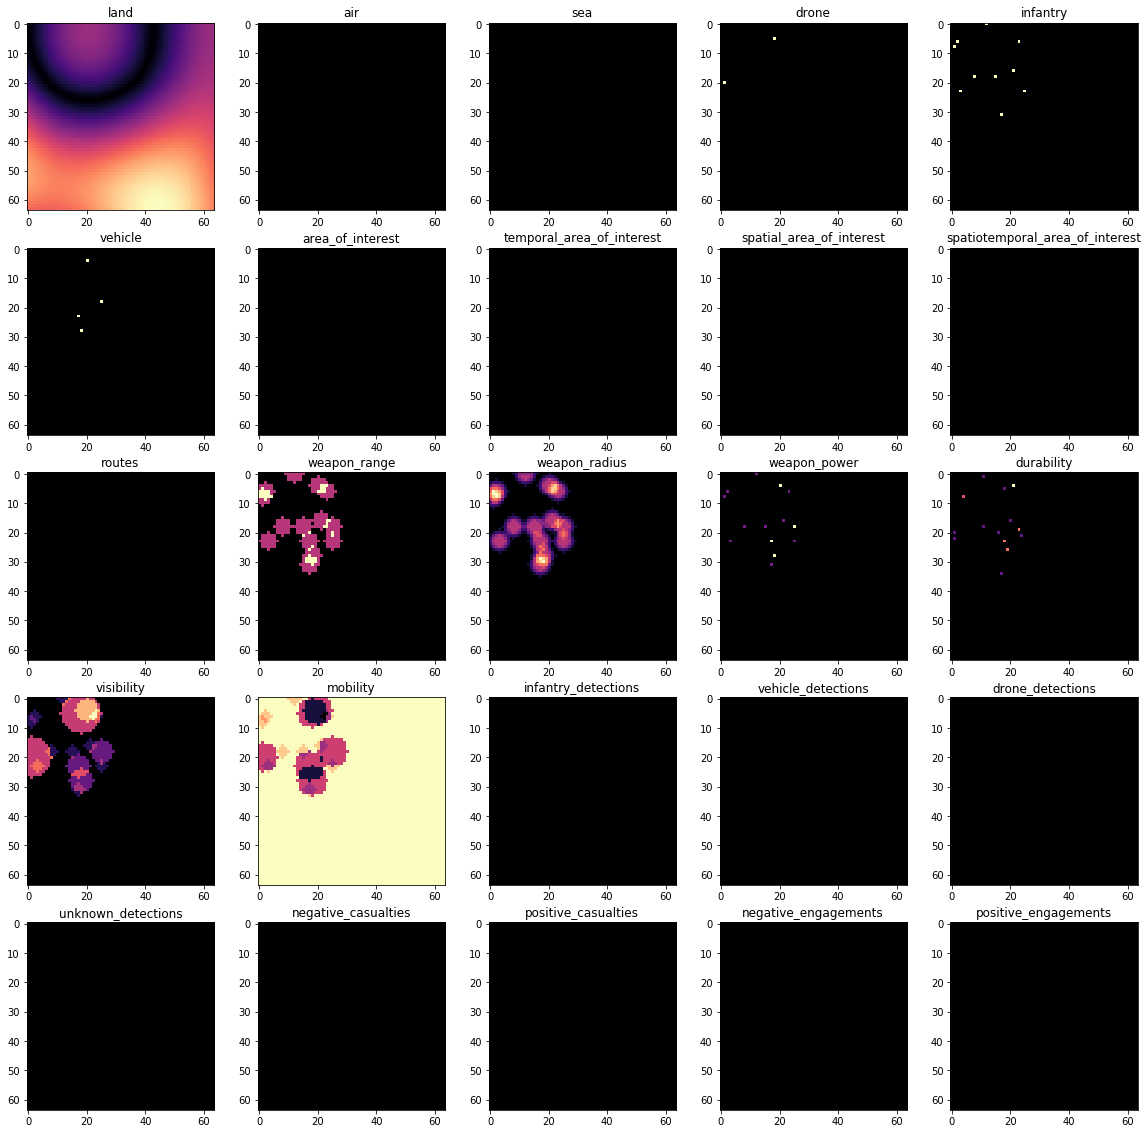

In [9]:
import numpy as np, matplotlib.pyplot as mp
from plato.features import global_features
fig,ax = mp.subplots(5,5, figsize=(20,20))
for itr,(name,feat) in enumerate(zip(global_features, minimap)):
    i,j = np.unravel_index(itr,(5,5))
    ax[i,j].set_title(name)
    ax[i,j].imshow(feat, cmap='magma')
mp.show()